# Quickstart

Once installation is complete you can start running Sarkas. This quickstart guide will walk you through
a simple example in order to check that everything is running smoothly.

The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/documentation/Tutorial_NB/input_files/yocp_quickstart.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/documentation/Tutorial_NB/Quickstart.ipynb)


---
## Simulation

In Jupyter notebook you can run the following commands

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline
import os

plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess

Using matplotlib backend: <object object at 0x10784ff40>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'yocp_quickstart.yaml')

The above commands imported the required libraries and define the file path to our input file. 

Let's now run the simulation

In [3]:
# pre = PreProcess(input_file_name)
# pre.setup(read_yaml=True)
# pre.run()

In [4]:
# Initialize the Simulation class
sim = Simulation(input_file_name)
# Setup the simulation's parameters
sim.setup(read_yaml=True)
# Run the simulation
# sim.run()







________             ______                
__  ___/_____ __________  /_______ ________
_____ \_  __ `/_  ___/_  //_/  __ `/_  ___/
____/ // /_/ /_  /   _  ,<  / /_/ /_(__  ) 
/____/ \__,_/ /_/    /_/|_| \__,_/ /____/  
                                           


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                   Simulation                                   
********************************************************************************

Job ID: yocp_quickstart
Job directory: SarkasSimulations/yocp_quickstart
Simulation directory: 
SarkasSimulations/yocp_quickstart/Simulation

Equilibration dumps directory: 
SarkasSimulations/yocp_quickstart/Simulation/Equilibration/dumps
Production dumps directory: 
SarkasSimulations/yocp_quickstart/Simulation/Production/dumps

Equilibration Thermodynamics file: 
SarkasSimulations/yocp_quickstart/Simu

In [5]:
sim.io.dump_xyz()

  0%|          | 0/1001 [00:00<?, ?it/s]

In [6]:
data = np.load(os.path.join(sim.io.directory_tree["simulation"]["production"]["dumps"]["path"], "checkpoint_0.npz"))

In [9]:
np.savetxt("stocazzo.txt", 
           np.c_[data["names"], data["pos"], data["vel"], data["acc"]],
           fmt="%s %.6e %.6e %.6e %.6e %.6e %.6e %.6e %.6e %.6e",
          )

array([['C', '1.0578510273006399e-07', '1.9796436810719027e-07', ...,
        '7.034712689306359e+18', '7.834148461342762e+18',
        '-3.8004909976738125e+18'],
       ['C', '3.940557093528033e-08', '1.2911671669341028e-08', ...,
        '-2.8740613069013985e+18', '2.264935025605363e+19',
        '-5.760152266759282e+18'],
       ['C', '1.8345210714396398e-07', '5.0600875881724704e-08', ...,
        '1.5214775189518973e+19', '-4.5292412070166533e+18',
        '-1.079169475512775e+18'],
       ...,
       ['C', '5.385949109916589e-08', '1.0296575098705775e-07', ...,
        '3.937451125514666e+18', '4.1468235784250486e+18',
        '-5.929544129240792e+18'],
       ['C', '1.3823667732575343e-07', '7.335300723380966e-08', ...,
        '9.431774865257748e+17', '-1.42735949803974e+18',
        '-1.0004393787697777e+18'],
       ['C', '4.738147048695899e-08', '1.4117995608309933e-07', ...,
        '-2.4380534251961677e+18', '5.575777397716662e+18',
        '5.028332507346384e+18']], dtyp

In [19]:
n = 9
# f"%s {['%.6e' for i in range(9)]}"
fmt = "{} " + " {:.6e}" * n

params = ["string"] + [0.123456, 0.234567, 0.345678, 0.456789, 0.567890, 0.678901, 0.789012, 0.890123, 0.8892]  # Sample parameters
fmt.format(*params)

'string  1.234560e-01 2.345670e-01 3.456780e-01 4.567890e-01 5.678900e-01 6.789010e-01 7.890120e-01 8.901230e-01 8.892000e-01'

## Postprocessing

Now that our simulation is complete we need to check if the simulation was physically sound. Run the following three lines will initialize the `PostProcess` class and calculate the observables defined in the input file.

It will also produce a plot of the Temperature and Total Energy of the Production phase. 

In [3]:
# Initialize the Postprocessing class
postproc = PostProcess(input_file_name)
# Read the simulation's parameters and assign attributes
postproc.setup(read_yaml=True)

AttributeError: Can't get attribute 'Yukawa_SR' on <module 'sarkas.potentials.yukawa' from '/Users/silves28/Documents/Codes/sarkas/sarkas/potentials/yukawa.py'>

In [5]:
from sarkas.tools.observables import RadialDistributionFunction, Thermodynamics,VelocityAutoCorrelationFunction



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/yocp_quickstart/PostProcessing/Thermodynamics/Production/Thermodynamics_yocp_quickstart.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of slices = 1
No. dumps per slice = 1001
Total time: T = 5.0050e-13 [s] ~ 20 plasma periods
Time interval step: dt = 5.0000e-16 ~ 2.0146e-02 plasma period

ACF Data:
If you choose to set equal_number_time_samples=True in compute_acf() then the following applies. 
Otherwise, the above applies.
No. of acf slices = 1
No. dumps per slice = 500
Largest time lag of the autocorrelation function: tau = 2.5000e-13 [s] ~ 10 plasma periods



Thermodynamics Time: 0 sec 48 msec 912 usec 875 nsec


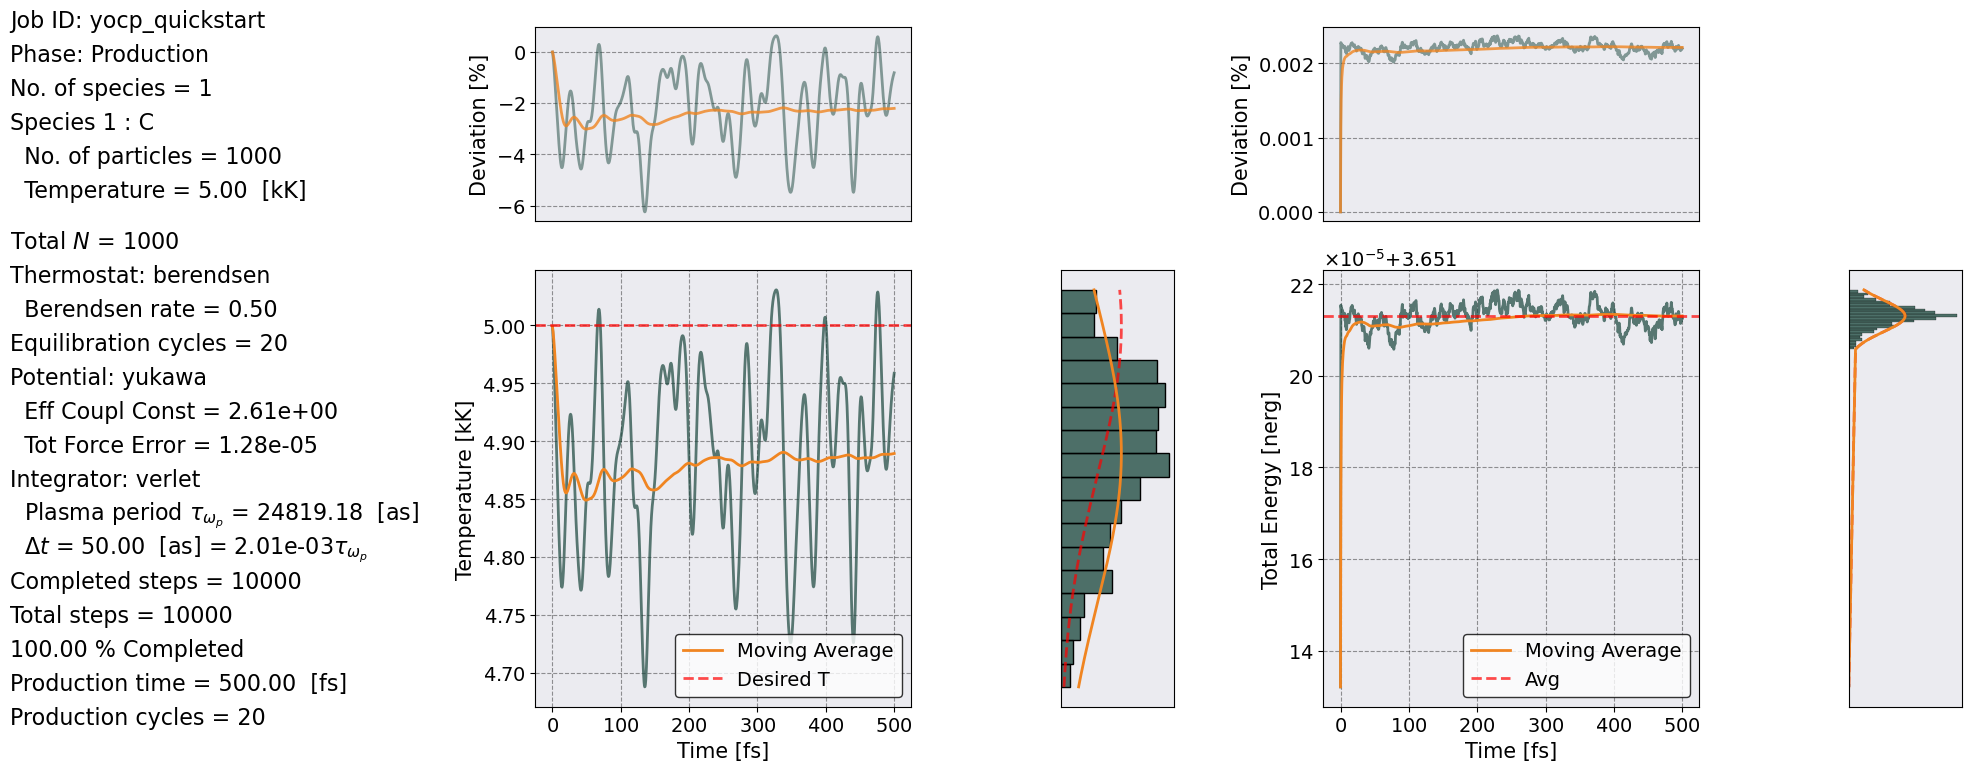

In [6]:
therm = Thermodynamics()
therm.setup(postproc.parameters, phase = "production")
therm.compute()
therm.temp_energy_plot(postproc)

You will notice that both the energy and temperature oscillates wildly. This is fine as long as the percentage deviations, in the top plots, are small. You should have a temperature deviations between -2% to ~ 4-5% while energy deviations between -2% and 1%.


___
## Observables

The most common observable is the radial distribution function. This can be calculated using the following code.

In [13]:
rdf = RadialDistributionFunction()
rdf.setup(postproc.parameters)
rdf.compute(from_dumps=True)
rdf.dataframe



==================== Radial Distribution Function ====================
Data saved in: 
 SarkasSimulations/yocp_quickstart/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_yocp_quickstart.h5
Data accessible via: self.dataframe_slices, self.dataframe
No. bins = 250
dr = 0.0187 a_ws = 2.4000e-10 [cm]
Maximum Distance (i.e. potential.rc)= 4.6852 a_ws = 6.0000e-08 [cm]
Time Series Data:
No. of slices = 1
No. dumps per slice = 1001
Total time: T = 5.0050e-13 [s] ~ 20 plasma periods
Time interval step: dt = 5.0000e-16 ~ 2.0146e-02 plasma period


Calculating Radial Distribution Function for slice:   0%|          | 0/1 [00:00<?, ?it/s]

Timestep:   0%|          | 0/1001 [00:00<?, ?it/s]


Radial Distribution Function Calculation Time: 2 sec 899 msec 620 usec 375 nsec


Interparticle   C-C RDF    
         Distance      Mean Std
0    0.000000e+00  0.000000 NaN
1    3.600000e-10  0.000000 NaN
2    6.000000e-10  0.000000 NaN
3    8.400000e-10  0.000000 NaN
4    1.080000e-09  0.000000 NaN
..            ...       ...  ..
245  5.892000e-08  1.003103 NaN
246  5.916000e-08  1.005228 NaN
247  5.940000e-08  1.002906 NaN
248  5.964000e-08  1.003323 NaN
249  5.988000e-08  1.002983 NaN

[250 rows x 3 columns]

In [11]:
rdf.dataframe

Interparticle   C-C RDF    
         Distance      Mean Std
0    0.000000e+00  0.000000 NaN
1    3.600000e-10  0.000000 NaN
2    6.000000e-10  0.000000 NaN
3    8.400000e-10  0.000000 NaN
4    1.080000e-09  0.000000 NaN
..            ...       ...  ..
245  5.892000e-08 -0.001940 NaN
246  5.916000e-08  0.003195 NaN
247  5.940000e-08  0.001420 NaN
248  5.964000e-08 -0.001425 NaN
249  5.988000e-08 -0.001410 NaN

[250 rows x 3 columns]

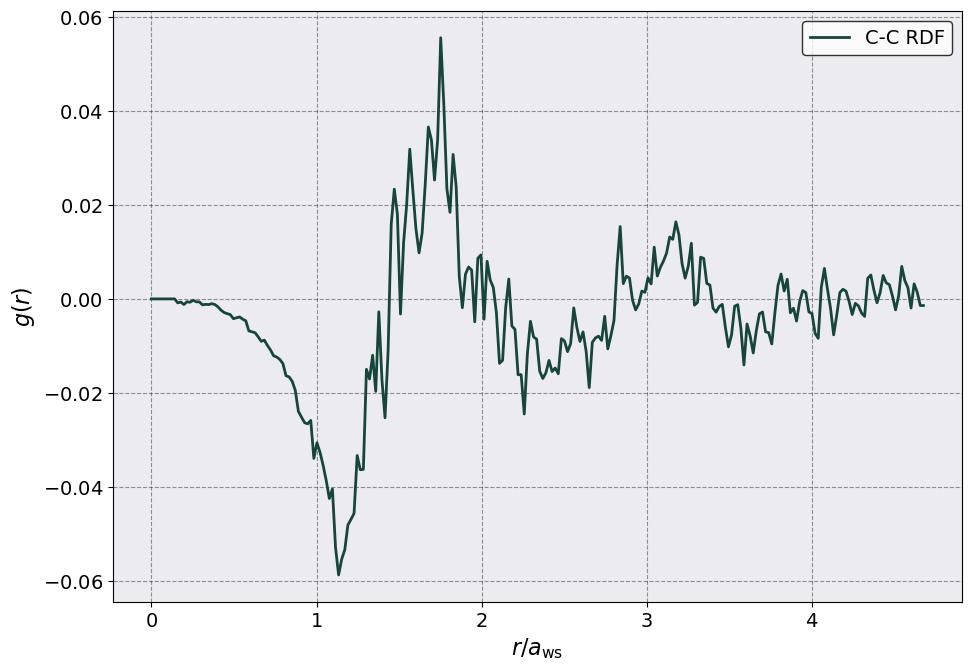

In [9]:
# Initialize the Pair Distribution Function class
ax = rdf.plot(
    scaling=postproc.parameters.a_ws,
    y = [("C-C RDF", "Mean")],
    xlabel = r'$r/a_{\rm ws}$',
    ylabel = r'$g(r)$'
)
ax.legend(["C-C RDF"])

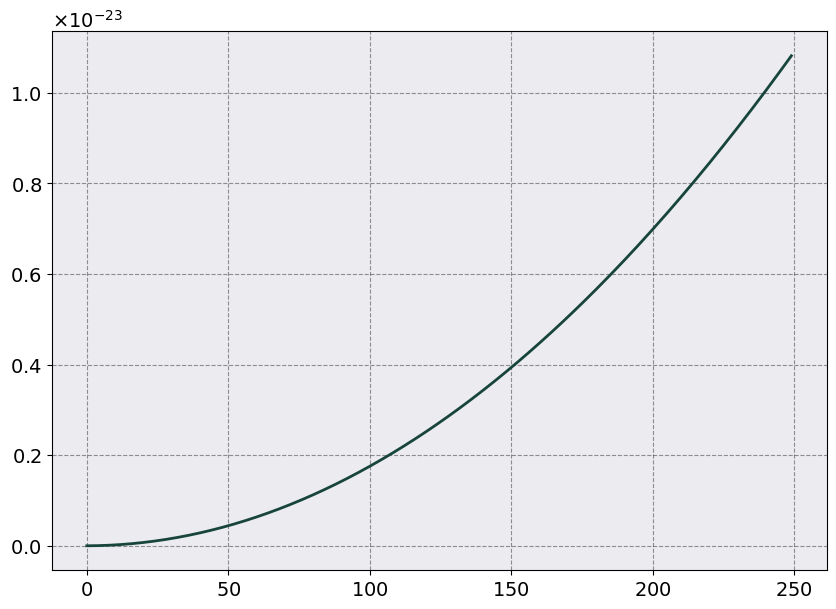

Things to check in here are: 

* Does $g(r)$ go to 1 for large $r$ values ?
* Is there a peak at $r \sim ~1.5 a$ ?
* Is the height of this peak about ~ 1.4?

If the answer to all these question is yes than the simulation was successfull.